In [4]:
# Seed value
# Apparently you may use different seed values at each stage
seed_value= 0

# 1. Set the `PYTHONHASHSEED` environment variable at a fixed value
import os
os.environ['PYTHONHASHSEED']=str(seed_value)

# 2. Set the `python` built-in pseudo-random generator at a fixed value
import random
random.seed(seed_value)

# 3. Set the `numpy` pseudo-random generator at a fixed value
import numpy as np
np.random.seed(seed_value)

# 4. Set the `tensorflow` pseudo-random generator at a fixed value
import tensorflow as tf
#tf.random.set_seed(seed_value)
# for later versions: 
tf.compat.v1.set_random_seed(seed_value)

# 5. Configure a new global `tensorflow` session
from keras import backend as K
#session_conf = tf.ConfigProto(intra_op_parallelism_threads=1, inter_op_parallelism_threads=1)
#sess = tf.Session(graph=tf.get_default_graph(), config=session_conf)
#K.set_session(sess)
# for later versions:
session_conf = tf.compat.v1.ConfigProto(intra_op_parallelism_threads=1, inter_op_parallelism_threads=1)
sess = tf.compat.v1.Session(graph=tf.compat.v1.get_default_graph(), config=session_conf)
tf.compat.v1.keras.backend.set_session(sess)

In [5]:

# python -m pip install SoundFile
import glob
import sys
from info import i, printb, printr, printp, print
import glob
import os
import librosa
import pdb
import csv
import json
import re
import numpy as np
import random
import librosa.display
import IPython.display as ipd
from sklearn import preprocessing
from collections import Counter
from matplotlib import pyplot as plt
from info import i, printb, printr, printp
import muda
import jams
from sklearn import svm
import librosa
import keras
import scipy.io as sio
import io
#-----------------------------------parameters for CNN -----------------------------------#
from sklearn.preprocessing import LabelEncoder
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split 
from sklearn import metrics
from sklearn.metrics import confusion_matrix
import itertools
from sklearn.metrics import classification_report
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import plot_precision_recall_curve
#from sklearn.metrics import plot_confusion_matrix
import matplotlib.pyplot as plt
from keras.models import Sequential, Input, Model 
from keras.layers import Dense, Dropout, Flatten, Activation 
from keras.layers import Conv2D , MaxPooling2D
from keras.layers.normalization import BatchNormalization 
from keras.layers.advanced_activations import LeakyReLU
from keras.optimizers import RMSprop
from keras.callbacks import ModelCheckpoint, EarlyStopping
from sklearn.metrics import confusion_matrix
from keras.models import Sequential, load_model
from keras.models import Model
from sklearn.metrics import accuracy_score 
import pandas as pd 
#-----------------------------------parameters for TTBOX -----------------------------------#
import timbre_descriptor as td
import numpy as np
import scipy as sc
import my_tools as mt
from collections import namedtuple
import scipy
import scipy.signal
from scipy.io import wavfile

import matplotlib
import swipep as swp             # used for sing le-F0 estimation
import warnings                 # used for warning removal
import time               # used performance benchmark
import librosa


from utils import get_list_samples_names, get_features_from_samples, write_Statelabels_from_beeNotBeelabels,raw_feature_fromSample, labels2binary , get_GT_labels_fromFiles, get_items2replicate, BalanceData_online, get_list_samples_name_MFCC, SVM_Classification_BeehiveSTATE , fit_and_evaluate ,deep_model, plot_confusion_matrix, get_list_samples_name_TTBOX, Dense_Net, plot_accuracy_val_accuracy, read_HiveState_fromSampleName ,train_and_evaluate_model , cross_validation_4folds, get_list_samples_name_ , constrainedsplit, save_confusion_matrix

In [6]:
#----------------------------------- parameters to change-----------------------------------#
block_size=1 # blocks of 1 second
thresholds=[0, 0.5]  # minimum length for nobee intervals: 0 or 5 seconds (creates one label file per threshold value)
path_audioFiles="C:\\Users\PC\python\Stage\To Bee or not to Bee_the annotated dataset"+os.sep  # path to audio files
annotations_path="C:\\Users\PC\python\Stage\To Bee or not to Bee_the annotated dataset"+os.sep # path to .lab files
path_save_audio_labels= 'C:\\Users\\PC\\python\\Stage\\dataset_BeeNoBee_2_second'+str(block_size)+'sec'+os.sep  # path where to save audio segments and labels files.
#----------------------------------- parameters to change-----------------------------------#
path_workingFolder='C:\\Users\\PC\\python\\Stage\\dataset_BeeNoBee_2_second'+str(block_size)+'sec'+os.sep  # path where to save audio segments and labels files.
labels2read= 'state_labels'
feature = 'MFCCs20'
path_working_MFCCs20= 'C:\\Users\\PC\\python\\Stage\\dataset_BeeNoBee_2_second'+str(block_size)+'sec'+'\\MFCCs20_matrix.mat'+os.sep
path_working_TTBox= 'C:\\Users\\PC\\python\\Stage\\dataset_BeeNoBee_2_second'+str(block_size)+'sec'+'\\TTBox_matrix.mat'+os.sep
path_working_stft= 'C:\\Users\\PC\\python\\Stage\\dataset_BeeNoBee_2_second'+str(block_size)+'sec'+'\\stft_matrix.mat'+os.sep
path_working_cqt= 'C:\\Users\\PC\\python\\Stage\\dataset_BeeNoBee_2_second'+str(block_size)+'sec'+'\\cqt_matrix.mat'+os.sep


path_save_audio_MFCCs= 'C:\\Users\\PC\\python\\Stage\\dataset_BeeNoBee_2_second'+str(block_size)+'sec'+'\\MFCCs20_matrix.mat'+os.sep 
path_save_audio_ttbox= 'C:\\Users\\PC\\python\\Stage\\dataset_BeeNoBee_2_second'+str(block_size)+'sec'+'\\ttb_mat'+os.sep 
path_save_audio_stft= 'C:\\Users\\PC\\python\\Stage\\dataset_BeeNoBee_2_second'+str(block_size)+'sec'+'\\stft_matrix.mat'+os.sep 
path_save_audio_cqt= 'C:\\Users\\PC\\python\\Stage\\dataset_BeeNoBee_2_second'+str(block_size)+'sec'+'\\cqt_matrix.mat'+os.sep 

nbits = 16;
MAX_VAL = pow(2,(nbits-1)) * 1.0;
target_names=['missing_queen', 'active']
#----------------------------------parameter for CNN -----------------------------------------------------------#

#early_stopping= EarlyStopping(monitor='val_loss', patience=pat, verbose=1 )
n_folds=4
epochs=50
batch_size=145



#----------------------------------------------------------------------------------------------#
# if path doesn't exist then create one !!!
if not os.path.exists(path_save_audio_labels):
    os.makedirs(path_save_audio_labels) 

# MFCCs+ SVM

[2020-06-01 14:28:53 RAM62.4% 0.5GB] Training on Fold : 1
[2020-06-01 14:28:53 RAM62.4% 0.5GB] fold==1
[2020-06-01 14:28:53 RAM62.5% 0.49GB] 13579 3716 13579 3716
[2020-06-01 14:28:53 RAM63.7% 0.58GB] (13579,) (13579, 20, 44) (3716,) (3716, 20, 44)
[2020-06-01 14:28:53 RAM63.9% 0.59GB] reshape the data: 
[2020-06-01 14:28:53 RAM63.9% 0.59GB] (13579,) (13579, 880) (2049,) (2049, 880)
[2020-06-01 14:28:53 RAM63.9% 0.59GB] 

[2020-06-01 14:28:53 RAM63.9% 0.59GB] Starting classification with SVM:
[2020-06-01 14:28:53 RAM63.9% 0.59GB] 

[2020-06-01 14:28:53 RAM63.9% 0.59GB] classification Beehive State into : Active or Missing Queen
[2020-06-01 14:47:04 RAM59.7% 0.44GB] Accuracy:  0.007320644216691069
[2020-06-01 14:47:04 RAM59.7% 0.44GB] Precision: 0.0
[2020-06-01 14:47:04 RAM59.8% 0.44GB] Recall: 0.0
[2020-06-01 14:47:05 RAM59.8% 0.44GB] Confusion matrix, without normalization
[2020-06-01 14:47:05 RAM59.8% 0.44GB] [[  15    1]
 [2033    0]]
[2020-06-01 14:47:05 RAM59.8% 0.44GB] ==========

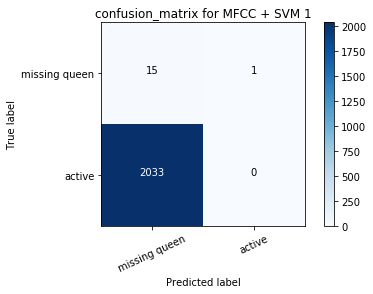

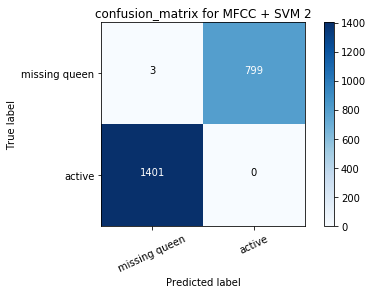

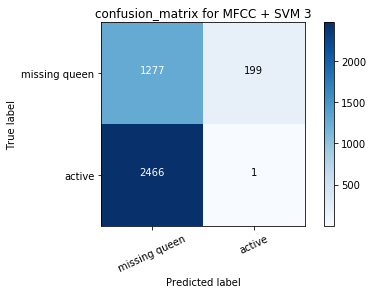

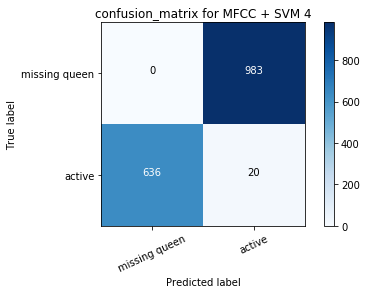

In [13]:
ruche1,Y1,labels1, sample_ids1, ruche2,Y2,labels2, sample_ids2, ruche3,Y3,labels3, sample_ids3, ruche4,Y4,labels4, sample_ids4=get_list_samples_name_('b',path_save_audio_MFCCs)
for i in range(4):
    fold= i+1
    print("Training on Fold :", i+1)

    x_train, x_test, y_train, y_test,sample_ids_train, sample_ids_test=cross_validation_4folds(i+1, ruche1,Y1, ruche2,Y2, ruche3,Y3, ruche4,Y4 , sample_ids1 , sample_ids2 , sample_ids3 , sample_ids4) 
    print(len(x_train), len(x_test), len(y_train), len(y_test))
    
    #y_train, x_train, sample_ids1_train= BalanceData_online(y_train, x_train, sample_ids_train)
    #y_test, x_test, sample_ids1_test= BalanceData_online(y_test, x_test, sample_ids_test)
    # Convert features and corresponding classification labels into numpy arrays
    X_train = np.array(x_train)
    y_train = np.array(y_train)
    X_test2 = np.array(x_test)
    y_test2 = np.array(y_test)
    print(y_train.shape, X_train.shape, y_test2.shape, X_test2.shape)
    
    X_test, y_test = constrainedsplit(y_train, X_test2, y_test2, 0.7)
    x, y, z= X_train.shape
    x1, y1, z1= X_test.shape
    print("reshape the data: ")
    X_train= X_train.reshape(x, y*z)
    X_test= X_test.reshape(x1, y1*z1)
    print(y_train.shape, X_train.shape, y_test.shape, X_test.shape)
    CLF, Test_GroundT, Train_GroundT, Test_Preds, Train_Preds, Test_Preds_Proba, Train_Preds_Proba = SVM_Classification_BeehiveSTATE(X_train, y_train , X_test, y_test, kerneloption='rbf')

    # Metrics
    print("Accuracy: ", metrics.accuracy_score( Test_GroundT, Test_Preds))
    # Model Precision: what percentage of positive tuples are labeled as such?
    print("Precision:",metrics.precision_score(Test_GroundT, Test_Preds))
    # Model Recall: what percentage of positive tuples are labelled as such?
    print("Recall:",metrics.recall_score(Test_GroundT, Test_Preds))
   
    # Compute confusion matrix
    confusion_mat = confusion_matrix(Test_GroundT, Test_Preds )
    filename="confusion_matrix for MFCC + SVM "+str(fold)
    save_confusion_matrix(confusion_mat,filename, class_names )
    
    report=classification_report(Test_GroundT, Test_Preds , target_names=target_names, output_dict=True)
    name="classification report for MFCC + SVM.csv "+str(fold)
    df = pd.DataFrame(report).transpose()
    df.to_csv(name)
    
    
    
    print("============="*12, end="\n\n\n")


In [35]:
for i in range(4):
    fold=i+1
    print("classification report for MFCC + SVM.csv "+str(fold))
    classi_report= pd.read_csv("classification report for MFCC + SVM.csv "+str(fold))
   
    print(classi_report)

[2020-06-01 15:51:14 RAM61.3% 0.37GB] classification report for MFCC + SVM.csv 1
[2020-06-01 15:51:14 RAM61.3% 0.37GB]       Unnamed: 0  precision    recall  f1-score      support
0  missing_queen   0.007324  0.937500  0.014535    16.000000
1         active   0.000000  0.000000  0.000000  2033.000000
2       accuracy   0.007321  0.007321  0.007321     0.007321
3      macro avg   0.003662  0.468750  0.007267  2049.000000
4   weighted avg   0.000057  0.007321  0.000113  2049.000000
[2020-06-01 15:51:14 RAM61.3% 0.37GB] classification report for MFCC + SVM.csv 2
[2020-06-01 15:51:14 RAM61.3% 0.37GB]       Unnamed: 0  precision    recall  f1-score      support
0  missing_queen   0.002137  0.003741  0.002720   802.000000
1         active   0.000000  0.000000  0.000000  1401.000000
2       accuracy   0.001362  0.001362  0.001362     0.001362
3      macro avg   0.001068  0.001870  0.001360  2203.000000
4   weighted avg   0.000778  0.001362  0.000990  2203.000000
[2020-06-01 15:51:14 RAM61.3% 

# TTBOX+ SVM

In [8]:
ruche1,Y1,labels1, sample_ids1, ruche2,Y2,labels2, sample_ids2, ruche3,Y3,labels3, sample_ids3, ruche4,Y4,labels4, sample_ids4=get_list_samples_name_('ttb_vec', path_save_audio_ttbox)

[2020-06-01 14:11:23 RAM60.3% 0.39GB] Training on Fold : 1
[2020-06-01 14:11:23 RAM60.3% 0.39GB] fold==1
[2020-06-01 14:11:23 RAM60.1% 0.36GB] 13579 3716 13579 3716
[2020-06-01 14:11:23 RAM60.1% 0.36GB] (13579,) (13579, 1, 164) (3716,) (3716, 1, 164)
[2020-06-01 14:11:23 RAM60.0% 0.36GB] reshape the data: 
[2020-06-01 14:11:23 RAM60.0% 0.36GB] (13579,) (13579, 164) (2049,) (2049, 164)
[2020-06-01 14:11:23 RAM60.1% 0.36GB] 

[2020-06-01 14:11:23 RAM60.1% 0.36GB] Starting classification with SVM:
[2020-06-01 14:11:23 RAM60.1% 0.36GB] 

[2020-06-01 14:11:23 RAM60.1% 0.36GB] classification Beehive State into : Active or Missing Queen
[2020-06-01 14:14:39 RAM59.8% 0.43GB] Accuracy:  0.0029282576866764276
[2020-06-01 14:14:39 RAM59.8% 0.43GB] Precision: 0.0
[2020-06-01 14:14:39 RAM59.8% 0.43GB] Recall: 0.0
[2020-06-01 14:14:39 RAM59.8% 0.43GB] Confusion matrix, without normalization
[2020-06-01 14:14:39 RAM59.8% 0.43GB] [[   6   10]
 [2033    0]]
[2020-06-01 14:14:39 RAM59.8% 0.43GB] =======

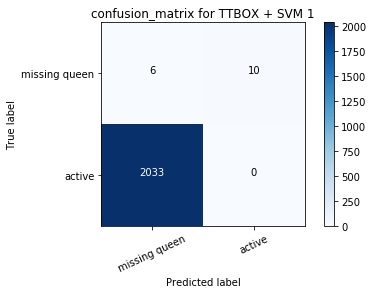

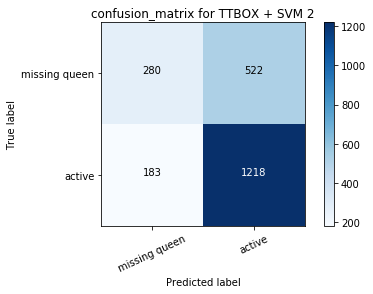

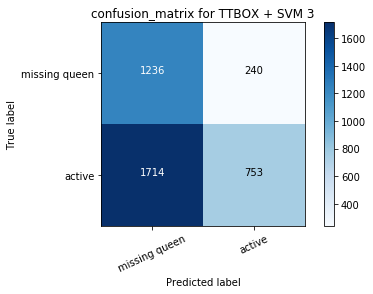

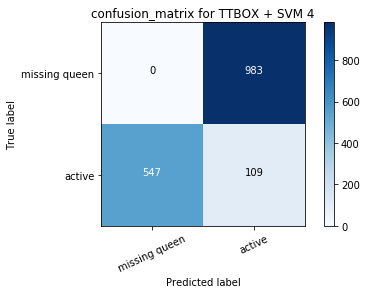

In [9]:
for i in range(4):
    fold= i+1
    print("Training on Fold :", i+1)

    x_train, x_test, y_train, y_test,sample_ids_train, sample_ids_test=cross_validation_4folds(i+1, ruche1,Y1, ruche2,Y2, ruche3,Y3, ruche4,Y4 , sample_ids1 , sample_ids2 , sample_ids3 , sample_ids4) 
    print(len(x_train), len(x_test), len(y_train), len(y_test))
    
    #y_train, x_train, sample_ids1_train= BalanceData_online(y_train, x_train, sample_ids_train)
    #y_test, x_test, sample_ids1_test= BalanceData_online(y_test, x_test, sample_ids_test)
    # Convert features and corresponding classification labels into numpy arrays
    X_train = np.array(x_train)
    y_train = np.array(y_train)
    X_test2 = np.array(x_test)
    y_test2 = np.array(y_test)
    print(y_train.shape, X_train.shape, y_test2.shape, X_test2.shape)
    
    X_test, y_test = constrainedsplit(y_train, X_test2, y_test2, 0.7)
    x, y, z= X_train.shape
    x1, y1, z1= X_test.shape
    print("reshape the data: ")
    X_train= X_train.reshape(x, y*z)
    X_test= X_test.reshape(x1, y1*z1)
    print(y_train.shape, X_train.shape, y_test.shape, X_test.shape)
    CLF, Test_GroundT, Train_GroundT, Test_Preds, Train_Preds, Test_Preds_Proba, Train_Preds_Proba = SVM_Classification_BeehiveSTATE(X_train, y_train , X_test, y_test, kerneloption='rbf')
    # Metrics
    print("Accuracy: ", metrics.accuracy_score( Test_GroundT, Test_Preds))
    # Model Precision: what percentage of positive tuples are labeled as such?
    print("Precision:",metrics.precision_score(Test_GroundT, Test_Preds))
    # Model Recall: what percentage of positive tuples are labelled as such?
    print("Recall:",metrics.recall_score(Test_GroundT, Test_Preds))
    # Compute confusion matrix
    confusion_mat = confusion_matrix(Test_GroundT, Test_Preds )
    filename="confusion_matrix for TTBOX + SVM "+str(fold)
    save_confusion_matrix(confusion_mat,filename, class_names )
    
    report=classification_report(Test_GroundT, Test_Preds , target_names=target_names, output_dict=True)
    name="classification report for TTBOX + SVM.csv "+str(fold)
    df = pd.DataFrame(report).transpose()
    df.to_csv(name)
    
    print("============="*12, end="\n\n\n")



In [10]:
for i in range(4):
    fold=i+1
    print("classification report for TTBOX + SVM.csv "+str(fold))
    classi_report= pd.read_csv("classification report for TTBOX + SVM.csv "+str(fold))
    print(classi_report)

[2020-06-01 14:26:24 RAM60.6% 0.42GB] classification report for TTBOX + SVM.csv 1
[2020-06-01 14:26:24 RAM60.6% 0.42GB]       Unnamed: 0  precision    recall  f1-score      support
0  missing_queen   0.002943  0.375000  0.005839    16.000000
1         active   0.000000  0.000000  0.000000  2033.000000
2       accuracy   0.002928  0.002928  0.002928     0.002928
3      macro avg   0.001471  0.187500  0.002920  2049.000000
4   weighted avg   0.000023  0.002928  0.000046  2049.000000
[2020-06-01 14:26:24 RAM60.6% 0.42GB] classification report for TTBOX + SVM.csv 2
[2020-06-01 14:26:24 RAM60.6% 0.42GB]       Unnamed: 0  precision    recall  f1-score      support
0  missing_queen   0.604752  0.349127  0.442688   802.000000
1         active   0.700000  0.869379  0.775549  1401.000000
2       accuracy   0.679982  0.679982  0.679982     0.679982
3      macro avg   0.652376  0.609253  0.609118  2203.000000
4   weighted avg   0.665325  0.679982  0.654371  2203.000000
[2020-06-01 14:26:24 RAM60.6

# MFCCs+ CNN

In [97]:
ruche1,Y1,labels1, sample_ids1, ruche2,Y2,labels2, sample_ids2, ruche3,Y3,labels3, sample_ids3, ruche4,Y4,labels4, sample_ids4=get_list_samples_name_('b',path_save_audio_MFCCs)

[2020-05-31 14:57:30 RAM59.7% 0.75GB] Training on Fold : 1
[2020-05-31 14:57:30 RAM59.7% 0.75GB] fold==1
[2020-05-31 14:57:30 RAM59.7% 0.75GB] 13579 3716 13579 3716
[2020-05-31 14:57:30 RAM60.8% 0.84GB] (13579,) (13579, 20, 44) (3716,) (3716, 20, 44)
[2020-05-31 14:57:30 RAM61.1% 0.85GB] 13579 2049 13579 2049
[2020-05-31 14:57:30 RAM61.1% 0.85GB] Reshape the data
[2020-05-31 14:57:30 RAM61.1% 0.85GB] Encode the classification labels


C:\Users\PC\anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:251: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[2020-05-31 14:57:42 RAM58.6% 0.74GB] Train...


C:\Users\PC\python\Stage\Audio_based_ V21\utils.py:665: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  results= model.fit(X_train, Y_train, batch_size=batch_size, nb_epoch=nb_epoch, callbacks=[stopping, checkpointer], verbose=2 , validation_data=(X_test, Y_test))


Train on 13579 samples, validate on 2049 samples
Epoch 1/50
 - 13s - loss: 0.6993 - accuracy: 0.7623 - val_loss: 3.3607 - val_accuracy: 0.0020

Epoch 00001: val_accuracy improved from -inf to 0.00195, saving model to cnn_model_cpu_multifilter_fold1.hdf5
Epoch 2/50
 - 12s - loss: 0.2042 - accuracy: 0.9191 - val_loss: 6.3778 - val_accuracy: 0.0015

Epoch 00002: val_accuracy did not improve from 0.00195
Epoch 3/50
 - 12s - loss: 0.1297 - accuracy: 0.9512 - val_loss: 8.1631 - val_accuracy: 0.0054

Epoch 00003: val_accuracy improved from 0.00195 to 0.00537, saving model to cnn_model_cpu_multifilter_fold1.hdf5
Epoch 4/50
 - 12s - loss: 0.0866 - accuracy: 0.9691 - val_loss: 12.1245 - val_accuracy: 0.0044

Epoch 00004: val_accuracy did not improve from 0.00537
Epoch 5/50
 - 13s - loss: 0.0693 - accuracy: 0.9760 - val_loss: 10.4974 - val_accuracy: 0.0020

Epoch 00005: val_accuracy did not improve from 0.00537
Epoch 6/50
 - 12s - loss: 0.0550 - accuracy: 0.9807 - val_loss: 9.9670 - val_accuracy:

C:\Users\PC\anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:251: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[2020-05-31 15:09:02 RAM62.7% 0.71GB] Train...


C:\Users\PC\python\Stage\Audio_based_ V21\utils.py:665: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  results= model.fit(X_train, Y_train, batch_size=batch_size, nb_epoch=nb_epoch, callbacks=[stopping, checkpointer], verbose=2 , validation_data=(X_test, Y_test))


Train on 15092 samples, validate on 2203 samples
Epoch 1/50
 - 14s - loss: 0.7196 - accuracy: 0.7733 - val_loss: 3.8884 - val_accuracy: 4.5393e-04

Epoch 00001: val_accuracy improved from -inf to 0.00045, saving model to cnn_model_cpu_multifilter_fold2.hdf5
Epoch 2/50
 - 16s - loss: 0.1852 - accuracy: 0.9280 - val_loss: 2.3527 - val_accuracy: 0.0772

Epoch 00002: val_accuracy improved from 0.00045 to 0.07717, saving model to cnn_model_cpu_multifilter_fold2.hdf5
Epoch 3/50
 - 14s - loss: 0.1033 - accuracy: 0.9590 - val_loss: 3.1022 - val_accuracy: 0.3441

Epoch 00003: val_accuracy improved from 0.07717 to 0.34408, saving model to cnn_model_cpu_multifilter_fold2.hdf5
Epoch 4/50
 - 16s - loss: 0.0661 - accuracy: 0.9767 - val_loss: 2.8209 - val_accuracy: 0.3650

Epoch 00004: val_accuracy improved from 0.34408 to 0.36496, saving model to cnn_model_cpu_multifilter_fold2.hdf5
Epoch 5/50
 - 16s - loss: 0.0564 - accuracy: 0.9790 - val_loss: 1.9674 - val_accuracy: 0.3690

Epoch 00005: val_accura

C:\Users\PC\anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:251: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[2020-05-31 15:21:43 RAM63.5% 0.63GB] Train...


C:\Users\PC\python\Stage\Audio_based_ V21\utils.py:665: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  results= model.fit(X_train, Y_train, batch_size=batch_size, nb_epoch=nb_epoch, callbacks=[stopping, checkpointer], verbose=2 , validation_data=(X_test, Y_test))


Train on 13132 samples, validate on 3943 samples
Epoch 1/50
 - 13s - loss: 0.3981 - accuracy: 0.8481 - val_loss: 3.1260 - val_accuracy: 0.2009

Epoch 00001: val_accuracy improved from -inf to 0.20086, saving model to cnn_model_cpu_multifilter_fold3.hdf5
Epoch 2/50
 - 12s - loss: 0.1090 - accuracy: 0.9558 - val_loss: 4.7801 - val_accuracy: 0.2630

Epoch 00002: val_accuracy improved from 0.20086 to 0.26300, saving model to cnn_model_cpu_multifilter_fold3.hdf5
Epoch 3/50
 - 13s - loss: 0.0695 - accuracy: 0.9735 - val_loss: 5.4780 - val_accuracy: 0.2450

Epoch 00003: val_accuracy did not improve from 0.26300
Epoch 4/50
 - 12s - loss: 0.0426 - accuracy: 0.9842 - val_loss: 7.2302 - val_accuracy: 0.2480

Epoch 00004: val_accuracy did not improve from 0.26300
Epoch 5/50
 - 14s - loss: 0.0361 - accuracy: 0.9874 - val_loss: 6.1098 - val_accuracy: 0.2300

Epoch 00005: val_accuracy did not improve from 0.26300
Epoch 6/50
 - 13s - loss: 0.0301 - accuracy: 0.9893 - val_loss: 6.4745 - val_accuracy: 0

C:\Users\PC\anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:251: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[2020-05-31 15:32:59 RAM65.0% 0.61GB] Train...


C:\Users\PC\python\Stage\Audio_based_ V21\utils.py:665: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  results= model.fit(X_train, Y_train, batch_size=batch_size, nb_epoch=nb_epoch, callbacks=[stopping, checkpointer], verbose=2 , validation_data=(X_test, Y_test))


Train on 10082 samples, validate on 1639 samples
Epoch 1/50
 - 11s - loss: 0.4146 - accuracy: 0.8671 - val_loss: 7.1940 - val_accuracy: 0.1531

Epoch 00001: val_accuracy improved from -inf to 0.15314, saving model to cnn_model_cpu_multifilter_fold4.hdf5
Epoch 2/50
 - 11s - loss: 0.0832 - accuracy: 0.9687 - val_loss: 10.6523 - val_accuracy: 0.1605

Epoch 00002: val_accuracy improved from 0.15314 to 0.16046, saving model to cnn_model_cpu_multifilter_fold4.hdf5
Epoch 3/50
 - 10s - loss: 0.0513 - accuracy: 0.9834 - val_loss: 13.2552 - val_accuracy: 0.2270

Epoch 00003: val_accuracy improved from 0.16046 to 0.22697, saving model to cnn_model_cpu_multifilter_fold4.hdf5
Epoch 4/50
 - 10s - loss: 0.0450 - accuracy: 0.9849 - val_loss: 11.0366 - val_accuracy: 0.2495

Epoch 00004: val_accuracy improved from 0.22697 to 0.24954, saving model to cnn_model_cpu_multifilter_fold4.hdf5
Epoch 5/50
 - 9s - loss: 0.0387 - accuracy: 0.9858 - val_loss: 13.5777 - val_accuracy: 0.2337

Epoch 00005: val_accurac

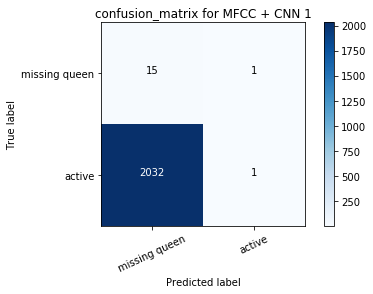

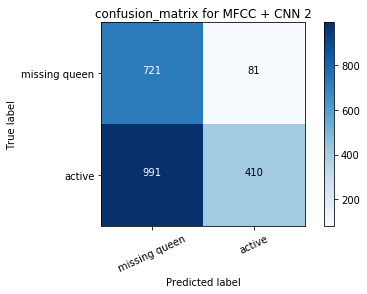

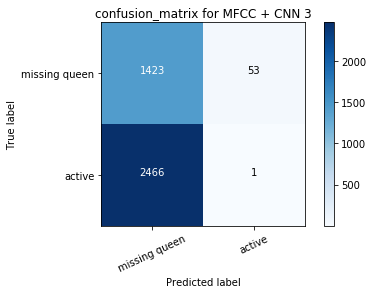

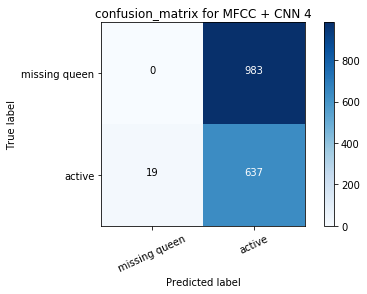

In [99]:
model_history=[]
val_accuracy=[]

for i in range(4):
    fold= i+1
    print("Training on Fold :", i+1)

    x_train, x_test, y_train, y_test,sample_ids_train, sample_ids_test=cross_validation_4folds(i+1, ruche1,Y1, ruche2,Y2, ruche3,Y3, ruche4,Y4 , sample_ids1 , sample_ids2 , sample_ids3 , sample_ids4) 
    print(len(x_train), len(x_test), len(y_train), len(y_test))
   
    #y_train, x_train, sample_ids1_train= BalanceData_online(y_train, x_train, sample_ids_train)
    #y_test, x_test, sample_ids1_test= BalanceData_online(y_test, x_test, sample_ids_test)
    # Convert features and corresponding classification labels into numpy arrays
    X_train = np.array(x_train)
    y_train = np.array(y_train)
    X_test2 = np.array(x_test)
    y_test2 = np.array(y_test)
    print(y_train.shape, X_train.shape, y_test2.shape, X_test2.shape)
    
    X_test, y_test = constrainedsplit(y_train, X_test2, y_test2, 0.7)
    print(len(X_train), len(X_test), len(y_train), len(y_test))
    
    print("Reshape the data")
    x, y, z= X_train.shape
    X_train= X_train.reshape(-1, 20, 44, 1)
    Y_train=y_train.reshape(-1, 1)

    x, y, z= X_test.shape
    X_test= X_test.reshape(-1, 20, 44, 1)
    Y_test=y_test.reshape(-1, 1)
    print("Encode the classification labels")  
    X_train = np.array(X_train.tolist())
    Y_train = np.array(Y_train.tolist())
    X_test = np.array(X_test.tolist())
    Y_test = np.array(Y_test.tolist())
    # Encode the classification labels
    le = LabelEncoder()
    y_train = to_categorical(le.fit_transform(Y_train)) 
    y_test = to_categorical(le.fit_transform(Y_test))

    size= ( 20,44, 1)
    
    model_filename = "cnn_model_cpu_multifilter_fold{}.hdf5".format(fold)
    model=None
    model=deep_model(size)
    results, val_acc, report, confusion_matrix = train_and_evaluate_model(model, X_train, y_train, X_test, y_test,  Y_test ,epochs, batch_size, model_filename )
    model_history.append(results)
    val_accuracy.append(val_acc)
    df = pd.DataFrame(report).transpose()
    name="classification report for MFCC + CNN.csv "+str(fold)
    filename="confusion_matrix for MFCC + CNN "+str(fold)
    df.to_csv(name)
    save_confusion_matrix(confusion_matrix,filename, class_names )
    print("============="*12, end="\n\n\n")


In [100]:
for i in range(4):
    fold=i+1
    print("classification report for MFCC + CNN.csv "+str(fold))
    classi_report= pd.read_csv("classification report for MFCC + CNN.csv "+str(fold))
    print(classi_report)

[2020-05-31 15:54:32 RAM61.5% 0.58GB] classification report for MFCC + CNN.csv 1
[2020-05-31 15:54:32 RAM61.5% 0.58GB]       Unnamed: 0  precision    recall  f1-score      support
0  missing_queen   0.007328  0.937500  0.014542    16.000000
1         active   0.500000  0.000492  0.000983  2033.000000
2       accuracy   0.007809  0.007809  0.007809     0.007809
3      macro avg   0.253664  0.468996  0.007762  2049.000000
4   weighted avg   0.496153  0.007809  0.001089  2049.000000
[2020-05-31 15:54:32 RAM61.5% 0.58GB] classification report for MFCC + CNN.csv 2
[2020-05-31 15:54:32 RAM61.5% 0.58GB]       Unnamed: 0  precision    recall  f1-score      support
0  missing_queen   0.421145  0.899002  0.573588   802.000000
1         active   0.835031  0.292648  0.433404  1401.000000
2       accuracy   0.513391  0.513391  0.513391     0.513391
3      macro avg   0.628088  0.595825  0.503496  2203.000000
4   weighted avg   0.684356  0.513391  0.484438  2203.000000
[2020-05-31 15:54:32 RAM61.5% 

[2020-05-31 15:54:38 RAM61.4% 0.58GB] The best val_accuracy of the fold 1 is :  0.7808687164470474
[2020-05-31 15:54:38 RAM61.4% 0.58GB] The best val_accuracy of the fold 2 is :  51.3390830685429
[2020-05-31 15:54:38 RAM61.4% 0.58GB] The best val_accuracy of the fold 3 is :  36.114633527770735
[2020-05-31 15:54:38 RAM61.4% 0.58GB] The best val_accuracy of the fold 4 is :  38.86516168395363


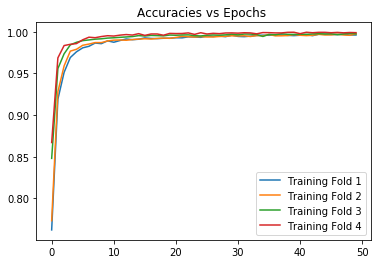

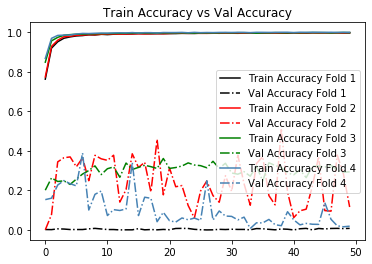

In [101]:
for i in range(len(val_accuracy)):
    fold=i+1
    print("The best val_accuracy of the fold "+str(fold)+" is : " ,val_accuracy[i]*100 )
    
plot_accuracy_val_accuracy(model_history)

# TTBOX+ DenseNet

In [102]:
ruche1,Y1,labels1, sample_ids1, ruche2,Y2,labels2, sample_ids2, ruche3,Y3,labels3, sample_ids3, ruche4,Y4,labels4, sample_ids4=get_list_samples_name_('ttb_vec', path_save_audio_ttbox)

[2020-05-31 15:55:47 RAM62.1% 0.62GB] Training on Fold : 1
[2020-05-31 15:55:47 RAM62.1% 0.62GB] fold==1
[2020-05-31 15:55:47 RAM60.8% 0.5GB] 13579 3716 13579 3716
[2020-05-31 15:55:47 RAM59.6% 0.41GB] (13579,) (13579, 1, 164) (3716,) (3716, 1, 164)
[2020-05-31 15:55:47 RAM59.6% 0.41GB] 13579 2049 13579 2049
[2020-05-31 15:55:47 RAM59.6% 0.41GB] Reshape the data
[2020-05-31 15:55:47 RAM59.6% 0.41GB] Encode the classification labels
[2020-05-31 15:55:51 RAM59.5% 0.42GB] Train...


C:\Users\PC\python\Stage\Audio_based_ V21\utils.py:665: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  results= model.fit(X_train, Y_train, batch_size=batch_size, nb_epoch=nb_epoch, callbacks=[stopping, checkpointer], verbose=2 , validation_data=(X_test, Y_test))


Train on 13579 samples, validate on 2049 samples
Epoch 1/50
 - 2s - loss: 0.4786 - accuracy: 0.8024 - val_loss: 27.6037 - val_accuracy: 0.0044

Epoch 00001: val_accuracy improved from -inf to 0.00439, saving model to DDN_model_cpu_multifilter_fold1.hdf5
Epoch 2/50
 - 1s - loss: 0.3484 - accuracy: 0.8507 - val_loss: 31.0628 - val_accuracy: 0.0044

Epoch 00002: val_accuracy did not improve from 0.00439
Epoch 3/50
 - 1s - loss: 0.3216 - accuracy: 0.8627 - val_loss: 16.1238 - val_accuracy: 0.0024

Epoch 00003: val_accuracy did not improve from 0.00439
Epoch 4/50
 - 1s - loss: 0.3005 - accuracy: 0.8708 - val_loss: 9.4851 - val_accuracy: 0.0039

Epoch 00004: val_accuracy did not improve from 0.00439
Epoch 5/50
 - 1s - loss: 0.2861 - accuracy: 0.8787 - val_loss: 8.1115 - val_accuracy: 0.0078

Epoch 00005: val_accuracy improved from 0.00439 to 0.00781, saving model to DDN_model_cpu_multifilter_fold1.hdf5
Epoch 6/50
 - 1s - loss: 0.2764 - accuracy: 0.8828 - val_loss: 10.8914 - val_accuracy: 0.0

C:\Users\PC\python\Stage\Audio_based_ V21\utils.py:665: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  results= model.fit(X_train, Y_train, batch_size=batch_size, nb_epoch=nb_epoch, callbacks=[stopping, checkpointer], verbose=2 , validation_data=(X_test, Y_test))


Train on 15092 samples, validate on 2203 samples
Epoch 1/50
 - 2s - loss: 0.4359 - accuracy: 0.8190 - val_loss: 1.2430 - val_accuracy: 0.6609

Epoch 00001: val_accuracy improved from -inf to 0.66092, saving model to DDN_model_cpu_multifilter_fold2.hdf5
Epoch 2/50
 - 1s - loss: 0.3250 - accuracy: 0.8563 - val_loss: 0.9668 - val_accuracy: 0.4344

Epoch 00002: val_accuracy did not improve from 0.66092
Epoch 3/50
 - 1s - loss: 0.2975 - accuracy: 0.8695 - val_loss: 0.7010 - val_accuracy: 0.6990

Epoch 00003: val_accuracy improved from 0.66092 to 0.69905, saving model to DDN_model_cpu_multifilter_fold2.hdf5
Epoch 4/50
 - 1s - loss: 0.2764 - accuracy: 0.8775 - val_loss: 0.3348 - val_accuracy: 0.8947

Epoch 00004: val_accuracy improved from 0.69905 to 0.89469, saving model to DDN_model_cpu_multifilter_fold2.hdf5
Epoch 5/50
 - 1s - loss: 0.2618 - accuracy: 0.8862 - val_loss: 0.2929 - val_accuracy: 0.9015

Epoch 00005: val_accuracy improved from 0.89469 to 0.90150, saving model to DDN_model_cpu_

C:\Users\PC\python\Stage\Audio_based_ V21\utils.py:665: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  results= model.fit(X_train, Y_train, batch_size=batch_size, nb_epoch=nb_epoch, callbacks=[stopping, checkpointer], verbose=2 , validation_data=(X_test, Y_test))


Train on 13132 samples, validate on 3943 samples
Epoch 1/50
 - 2s - loss: 0.1751 - accuracy: 0.9322 - val_loss: 4.5477 - val_accuracy: 0.3941

Epoch 00001: val_accuracy improved from -inf to 0.39412, saving model to DDN_model_cpu_multifilter_fold3.hdf5
Epoch 2/50
 - 1s - loss: 0.1089 - accuracy: 0.9567 - val_loss: 4.0313 - val_accuracy: 0.4207

Epoch 00002: val_accuracy improved from 0.39412 to 0.42075, saving model to DDN_model_cpu_multifilter_fold3.hdf5
Epoch 3/50
 - 1s - loss: 0.0951 - accuracy: 0.9625 - val_loss: 3.7220 - val_accuracy: 0.4147

Epoch 00003: val_accuracy did not improve from 0.42075
Epoch 4/50
 - 1s - loss: 0.0877 - accuracy: 0.9654 - val_loss: 3.0747 - val_accuracy: 0.4121

Epoch 00004: val_accuracy did not improve from 0.42075
Epoch 5/50
 - 1s - loss: 0.0848 - accuracy: 0.9660 - val_loss: 3.6954 - val_accuracy: 0.3977

Epoch 00005: val_accuracy did not improve from 0.42075
Epoch 6/50
 - 1s - loss: 0.0801 - accuracy: 0.9686 - val_loss: 2.5454 - val_accuracy: 0.4053


C:\Users\PC\python\Stage\Audio_based_ V21\utils.py:665: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  results= model.fit(X_train, Y_train, batch_size=batch_size, nb_epoch=nb_epoch, callbacks=[stopping, checkpointer], verbose=2 , validation_data=(X_test, Y_test))


Train on 10082 samples, validate on 1639 samples
Epoch 1/50
 - 2s - loss: 0.3904 - accuracy: 0.8560 - val_loss: 3.2626 - val_accuracy: 0.3764

Epoch 00001: val_accuracy improved from -inf to 0.37645, saving model to DDN_model_cpu_multifilter_fold4.hdf5
Epoch 2/50
 - 1s - loss: 0.1891 - accuracy: 0.9243 - val_loss: 6.2152 - val_accuracy: 0.3533

Epoch 00002: val_accuracy did not improve from 0.37645
Epoch 3/50
 - 1s - loss: 0.1684 - accuracy: 0.9323 - val_loss: 5.3716 - val_accuracy: 0.1117

Epoch 00003: val_accuracy did not improve from 0.37645
Epoch 4/50
 - 1s - loss: 0.1542 - accuracy: 0.9367 - val_loss: 4.3352 - val_accuracy: 0.0763

Epoch 00004: val_accuracy did not improve from 0.37645
Epoch 5/50
 - 1s - loss: 0.1421 - accuracy: 0.9414 - val_loss: 5.5575 - val_accuracy: 0.1342

Epoch 00005: val_accuracy did not improve from 0.37645
Epoch 6/50
 - 1s - loss: 0.1363 - accuracy: 0.9434 - val_loss: 7.5390 - val_accuracy: 0.0872

Epoch 00006: val_accuracy did not improve from 0.37645
Ep

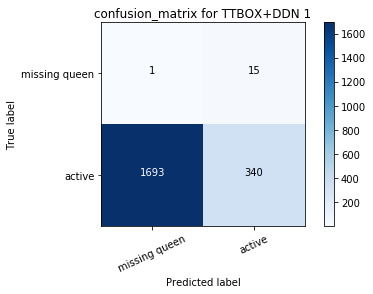

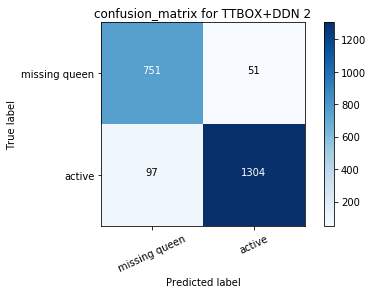

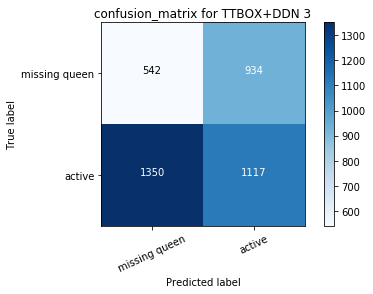

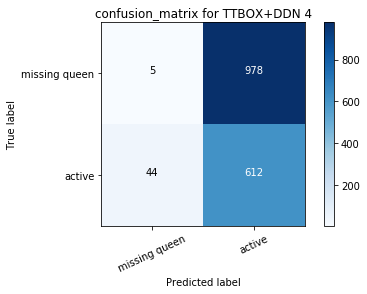

In [103]:
# save the model history in a list after fitting so we can plot later 
model_history=[]
val_accuracy=[]
for i in range(4):
    fold= i+1
    print("Training on Fold :", i+1)

    x_train, x_test, y_train, y_test,sample_ids_train, sample_ids_test=cross_validation_4folds(i+1, ruche1,Y1, ruche2,Y2, ruche3,Y3, ruche4,Y4 , sample_ids1 , sample_ids2 , sample_ids3 , sample_ids4) 
    print(len(x_train), len(x_test), len(y_train), len(y_test))
   
    X_train = np.array(x_train)
    y_train = np.array(y_train)
    X_test2 = np.array(x_test)
    y_test2 = np.array(y_test)
    print(y_train.shape, X_train.shape, y_test2.shape, X_test2.shape)
    
    X_test, y_test = constrainedsplit(y_train, X_test2, y_test2, 0.7)
    print(len(X_train), len(X_test), len(y_train), len(y_test))
    
    print("Reshape the data")
    x, y, z= X_train.shape
    X_train= X_train.reshape(-1, 164, 1)
    Y_train=y_train.reshape(-1, 1)

    x, y, z= X_test.shape
    X_test= X_test.reshape(-1, 164, 1)
    Y_test=y_test.reshape(-1, 1)
    print("Encode the classification labels")  
    X_train = np.array(X_train.tolist())
    y_train = np.array(y_train.tolist())
    X_test = np.array(X_test.tolist())
    y_test = np.array(y_test.tolist())
    # Encode the classification labels
    le = LabelEncoder()
    y_train = to_categorical(le.fit_transform(y_train)) 
    y_test = to_categorical(le.fit_transform(y_test))
    
    size=(164, 1)
    model_filename = "DDN_model_cpu_multifilter_fold{}.hdf5".format(fold)
    model=None
    model=Dense_Net(size)
    #results=train_and_evaluate_model(model, X_train, y_train, X_test, y_test,  Y_test ,epochs, batch_size, model_filename ) 
    #model_history.append(train_and_evaluate_model(model, X_train, y_train, X_test, y_test,  Y_test ,epochs, batch_size, model_filename ))
    results, val_acc, report, confusion_matrix = train_and_evaluate_model(model, X_train, y_train, X_test, y_test,  Y_test ,epochs, batch_size, model_filename )
    model_history.append(results)
    val_accuracy.append(val_acc)
    df = pd.DataFrame(report).transpose()
    name="classification report for TTBOX + DDN.csv "+str(fold)
    filename="confusion_matrix for TTBOX+DDN "+str(fold)
    df.to_csv(name)
    save_confusion_matrix(confusion_matrix,filename, class_names )
    print("============="*12, end="\n\n\n")



In [104]:
for i in range(4):
    fold=i+1
    print("classification report for TTBOX + DDN for fold "+str(fold))
    classi_report= pd.read_csv("classification report for TTBOX + DDN.csv "+str(fold))
    print(classi_report)


[2020-05-31 16:12:39 RAM60.6% 0.56GB] classification report for TTBOX + DDN for fold 1
[2020-05-31 16:12:39 RAM60.6% 0.56GB]       Unnamed: 0  precision    recall  f1-score      support
0  missing_queen   0.000590  0.062500  0.001170    16.000000
1         active   0.957746  0.167241  0.284757  2033.000000
2       accuracy   0.166423  0.166423  0.166423     0.166423
3      macro avg   0.479168  0.114870  0.142963  2049.000000
4   weighted avg   0.950272  0.166423  0.282543  2049.000000
[2020-05-31 16:12:39 RAM60.6% 0.56GB] classification report for TTBOX + DDN for fold 2
[2020-05-31 16:12:39 RAM60.6% 0.56GB]       Unnamed: 0  precision    recall  f1-score      support
0  missing_queen   0.885613  0.936409  0.910303   802.000000
1         active   0.962362  0.930764  0.946299  1401.000000
2       accuracy   0.932819  0.932819  0.932819     0.932819
3      macro avg   0.923987  0.933586  0.928301  2203.000000
4   weighted avg   0.934421  0.932819  0.933195  2203.000000
[2020-05-31 16:12:

[2020-05-31 16:12:49 RAM60.5% 0.56GB] The best val_accuracy of the fold 1 is :  16.642264519277695
[2020-05-31 16:12:49 RAM60.5% 0.56GB] The best val_accuracy of the fold 2 is :  93.28188833408989
[2020-05-31 16:12:49 RAM60.5% 0.56GB] The best val_accuracy of the fold 3 is :  42.07456251585088
[2020-05-31 16:12:49 RAM60.5% 0.56GB] The best val_accuracy of the fold 4 is :  37.64490543014033


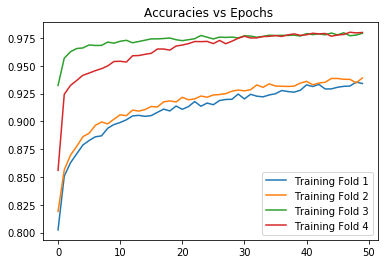

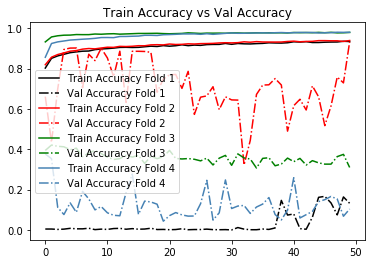

In [105]:
for i in range(len(val_accuracy)):
    fold=i+1
    print("The best val_accuracy of the fold "+str(fold)+" is : " ,val_accuracy[i]*100)
    
plot_accuracy_val_accuracy(model_history)
liste= [0.26318622174381057, ]


# STFT +CNN

In [7]:
ruche1,Y1,labels1, sample_ids1, ruche2,Y2,labels2, sample_ids2, ruche3,Y3,labels3, sample_ids3, ruche4,Y4,labels4, sample_ids4=get_list_samples_name_('b', path_save_audio_stft)


In [ ]:

# save the model history in a list after fitting so we can plot later 
model_history=[]
val_accuracy=[]
for i in range(4):
    fold= i+1
    print("Training on Fold :", fold)
    x_train, x_test, y_train, y_test,sample_ids_train, sample_ids_test=cross_validation_4folds(fold, ruche1,Y1, ruche2,Y2, ruche3,Y3, ruche4,Y4 , sample_ids1 , sample_ids2 , sample_ids3 , sample_ids4) 
    print(len(x_train), len(x_test), len(y_train), len(y_test))

    # Convert features and corresponding classification labels into numpy arrays
    X_train_abs = np.abs(x_train)
    X_test_abs = np.abs(x_test)
    print("tolist()")
    X_train = np.array(X_train_abs)
    y_train = np.array(y_train)
    X_test2 = np.array(X_test_abs)
    y_test2 = np.array(y_test)
    print(y_train.shape, X_train.shape, y_test2.shape, X_test2.shape)
    
    
    X_test, y_test = constrainedsplit(y_train, X_test2, y_test2, 0.7)
    print(len(X_train), len(X_test), len(y_train), len(y_test))
    
    print("Reshape the data")
    
    x, y, z= X_train.shape
    X_train= X_train.reshape(-1, 1025, 44, 1)
    Y_train=y_train.reshape(-1, 1)

    x, y, z= X_test.shape
    X_test= X_test.reshape(-1,  1025, 44, 1)
    Y_test=y_test.reshape(-1, 1)
    
  
    print("labelencoder")
    # Encode the classification labels
    le = LabelEncoder()
    y_train = to_categorical(le.fit_transform(y_train)) 
    y_test = to_categorical(le.fit_transform(y_test))
    
    
    size=( 1025,44, 1)
    model_filename = "stft_cnn_model_cpu_multifilter_fold{}.hdf5".format(fold)
    model=None
    model=deep_model(size)
    results, val_acc, report, confusion_matrix = train_and_evaluate_model(model, X_train, y_train, X_test, y_test,  Y_test ,epochs, batch_size, model_filename )
    model_history.append(results)
    val_accuracy.append(val_acc)
    df = pd.DataFrame(report).transpose()
    name="classification report for stft + CNN.csv "+str(fold)
    filename="confusion_matrix for stft + CNN "+str(fold)
    df.to_csv(name)
    save_confusion_matrix(confusion_matrix,filename )
    print("============="*12, end="\n\n\n")


[2020-06-01 23:10:37 RAM89.5% 4.03GB] Training on Fold : 1
[2020-06-01 23:10:37 RAM89.5% 4.03GB] fold==1
[2020-06-01 23:10:37 RAM89.5% 4.03GB] 13579 3716 13579 3716
[2020-06-01 23:14:38 RAM75.6% 3.57GB] tolist()
[2020-06-01 23:15:01 RAM94.4% 0.82GB] (13579,) (13579, 1025, 44) (3716,) (3716, 1025, 44)
[2020-06-01 23:15:08 RAM89.8% 0.08GB] 13579 2049 13579 2049
[2020-06-01 23:15:08 RAM89.5% 0.08GB] Reshape the data
[2020-06-01 23:15:08 RAM89.4% 0.08GB] labelencoder
[2020-06-01 23:15:18 RAM82.4% 0.13GB] Train...


C:\Users\PC\python\Stage\Audio_based_ V21\utils.py:663: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  results= model.fit(X_train, Y_train, batch_size=batch_size, nb_epoch=nb_epoch, callbacks=[stopping, checkpointer], verbose=2 , validation_data=(X_test, Y_test))


Train on 13579 samples, validate on 2049 samples
Epoch 1/50
 - 1026s - loss: 0.4105 - accuracy: 0.8196 - val_loss: 2.4678 - val_accuracy: 4.8804e-04

Epoch 00001: val_accuracy improved from -inf to 0.00049, saving model to stft_cnn_model_cpu_multifilter_fold1.hdf5
Epoch 2/50
 - 971s - loss: 0.2425 - accuracy: 0.9091 - val_loss: 2.8247 - val_accuracy: 0.0000e+00

Epoch 00002: val_accuracy did not improve from 0.00049
Epoch 3/50
 - 33331s - loss: 0.1678 - accuracy: 0.9351 - val_loss: 3.9598 - val_accuracy: 9.7609e-04


In [ ]:
for i in range(4):
    fold=i+1
    print("classification report for stft+ CNN for fold "+str(fold))
    classi_report= pd.read_csv("classification report for TTBOX + DDN.csv "+str(fold))
    print(classi_report)


In [ ]:
for i in range(len(val_accuracy)):
    fold=i+1
    print("The best val_accuracy of the fold "+str(fold)+" is : " ,val_accuracy[i]*100fgvt)
    
plot_accuracy_val_accuracy(model_history)